<a href="https://colab.research.google.com/github/panharithyi/MSIT-ML/blob/main/ML_Lecture_14%2615_Classify_Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Download and visualize dataset https://www.kaggle.com/c/dogs-vs-cats

## First, let's download the 786M ZIP archive of the raw data:


In [ ]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   220M      0  0:00:03  0:00:03 --:--:--  220M


## Unzip the zip file

In [ ]:
!unzip -q kagglecatsanddogs_5340.zip
!ls

 CDLA-Permissive-2.0.pdf      PetImages        sample_data
 kagglecatsanddogs_5340.zip  'readme[1].txt'


## Now we have a PetImages folder which contain two subfolders, Cat and Dog. Each subfolder contains image files for each category.

In [ ]:
# PetImages/Cat
# PetImages/Dog

!ls PetImages

Cat  Dog


In [ ]:
# List images in Cat folder
!ls PetImages/Cat

0.jpg	   11608.jpg  1966.jpg	3573.jpg  5180.jpg  6789.jpg  8396.jpg
10000.jpg  11609.jpg  1967.jpg	3574.jpg  5181.jpg  678.jpg   8397.jpg
10001.jpg  1160.jpg   1968.jpg	3575.jpg  5182.jpg  6790.jpg  8398.jpg
10002.jpg  11610.jpg  1969.jpg	3576.jpg  5183.jpg  6791.jpg  8399.jpg
10003.jpg  11611.jpg  196.jpg	3577.jpg  5184.jpg  6792.jpg  839.jpg
10004.jpg  11612.jpg  1970.jpg	3578.jpg  5185.jpg  6793.jpg  83.jpg
10005.jpg  11613.jpg  1971.jpg	3579.jpg  5186.jpg  6794.jpg  8400.jpg
10006.jpg  11614.jpg  1972.jpg	357.jpg   5187.jpg  6795.jpg  8401.jpg
10007.jpg  11615.jpg  1973.jpg	3580.jpg  5188.jpg  6796.jpg  8402.jpg
10008.jpg  11616.jpg  1974.jpg	3581.jpg  5189.jpg  6797.jpg  8403.jpg
10009.jpg  11617.jpg  1975.jpg	3582.jpg  518.jpg   6798.jpg  8404.jpg
1000.jpg   11618.jpg  1976.jpg	3583.jpg  5190.jpg  6799.jpg  8405.jpg
10010.jpg  11619.jpg  1977.jpg	3584.jpg  5191.jpg  679.jpg   8406.jpg
10011.jpg  1161.jpg   1978.jpg	3585.jpg  5192.jpg  67.jpg    8407.jpg
10012.jpg  11620.jpg  1979

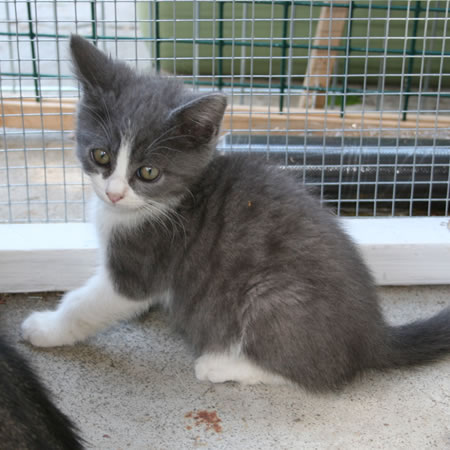

In [ ]:
# visualize a cat image
from IPython.display import Image
Image(filename='PetImages/Cat/5160.jpg') 

In [ ]:
# list all dog images
!ls PetImages/Dog

0.jpg	   11608.jpg  1966.jpg	3573.jpg  5180.jpg  6789.jpg  8396.jpg
10000.jpg  11609.jpg  1967.jpg	3574.jpg  5181.jpg  678.jpg   8397.jpg
10001.jpg  1160.jpg   1968.jpg	3575.jpg  5182.jpg  6790.jpg  8398.jpg
10002.jpg  11610.jpg  1969.jpg	3576.jpg  5183.jpg  6791.jpg  8399.jpg
10003.jpg  11611.jpg  196.jpg	3577.jpg  5184.jpg  6792.jpg  839.jpg
10004.jpg  11612.jpg  1970.jpg	3578.jpg  5185.jpg  6793.jpg  83.jpg
10005.jpg  11613.jpg  1971.jpg	3579.jpg  5186.jpg  6794.jpg  8400.jpg
10006.jpg  11614.jpg  1972.jpg	357.jpg   5187.jpg  6795.jpg  8401.jpg
10007.jpg  11615.jpg  1973.jpg	3580.jpg  5188.jpg  6796.jpg  8402.jpg
10008.jpg  11616.jpg  1974.jpg	3581.jpg  5189.jpg  6797.jpg  8403.jpg
10009.jpg  11617.jpg  1975.jpg	3582.jpg  518.jpg   6798.jpg  8404.jpg
1000.jpg   11618.jpg  1976.jpg	3583.jpg  5190.jpg  6799.jpg  8405.jpg
10010.jpg  11619.jpg  1977.jpg	3584.jpg  5191.jpg  679.jpg   8406.jpg
10011.jpg  1161.jpg   1978.jpg	3585.jpg  5192.jpg  67.jpg    8407.jpg
10012.jpg  11620.jpg  1979

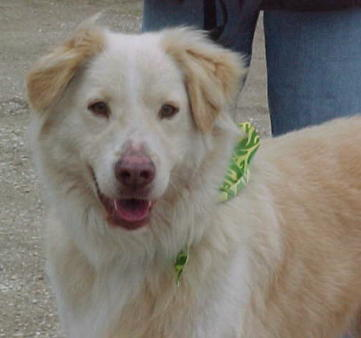

In [ ]:
from IPython.display import Image
Image(filename='PetImages/Dog/11593.jpg') 

## Filter out corrupted images
When working with lots of real-world image data, corrupted images are a common occurence. Let's filter out badly-encoded images that do not feature the string "JFIF" in their header.

In [ ]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 1590 images


## For demo purpose, only keep 1000 + 1000 images of cat & dog for training

In [ ]:
import glob
dog_images = glob.glob('PetImages/Dog/*.jpg')
len(dog_images)

11669

In [ ]:
# keep 100 dog images for training
keep = 1000 
for im in dog_images[keep:]:
  os.remove(im)

dog_images = glob.glob('PetImages/Dog/*.jpg')
len(dog_images)

1000

In [ ]:
import glob
cat_images = glob.glob('PetImages/Cat/*.jpg')
len(cat_images)

11741

In [ ]:
# keep 1000 cat images for training
for im in cat_images[keep:]:
  os.remove(im)

cat_images = glob.glob('PetImages/Cat/*.jpg')
len(cat_images)

1000

# Generate a Dataset

In [ ]:
image_size = (180, 180)
batch_size = 100
val_split = 0.2 # 20% for validation, 80% for training

# for reading training dataset from "PetImages"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=val_split,
    subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

# for reading validation dataset from "PetImages"
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=val_split,
    subset="validation",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.


# Build a model

In [ ]:
input_shape = image_size + (3,)

num_classes = 2 # cat, dog
if num_classes == 2:
  output_activation = "sigmoid"
  output_neuron = 1

In [ ]:
# Build our model from scratch

model = keras.Sequential(
    [
        keras.Input(shape=input_shape), # shape: 180x180x3
     
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # Convolution Layer + ReLU layer
        layers.MaxPooling2D(pool_size=(2, 2)), # Pooling Layer 
     
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Flatten(), # reshape from 2D to 1D
        layers.Dense(output_neuron, activation=output_activation)
    ]
)


In [ ]:
# Build our model by using pre-trained model



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

In [ ]:
# compile and train our model
epochs = 20

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/20
16/16 [==============================] - 16s 237ms/step - loss: 18.7012 - accuracy: 0.5100 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/20
16/16 [==============================] - 5s 224ms/step - loss: 0.6808 - accuracy: 0.5675 - val_loss: 0.7180 - val_accuracy: 0.5350
Epoch 3/20
16/16 [==============================] - 4s 224ms/step - loss: 0.6483 - accuracy: 0.6187 - val_loss: 0.6725 - val_accuracy: 0.6100
Epoch 4/20
16/16 [==============================] - 4s 223ms/step - loss: 0.5889 - accuracy: 0.6894 - val_loss: 0.7002 - val_accuracy: 0.6025
Epoch 5/20
16/16 [==============================] - 4s 225ms/step - loss: 0.5297 - accuracy: 0.7300 - val_loss: 0.7241 - val_accuracy: 0.6475
Epoch 6/20
16/16 [==============================] - 4s 224ms/step - loss: 0.4717 - accuracy: 0.7638 - val_loss: 0.7771 - val_accuracy: 0.6125
Epoch 7/20
16/16 [==============================] - 5s 228ms/step - loss: 0.4504 - accuracy: 0.7825 - val_loss: 0.7670 - val_accuracy: 0.5950
Epoc

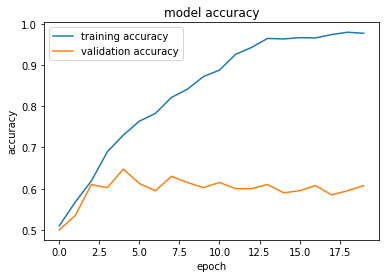

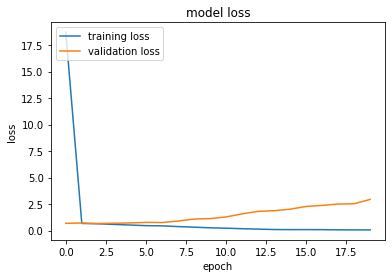

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='upper left')
plt.show()

# Plot losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper left')
plt.show()

# Predict

In [ ]:
# Load 1 test image

img = keras.preprocessing.image.load_img("/content/shutterstock_149489132.0.0.jpg", target_size=image_size)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

# predict the test iamge
predictions = model.predict(img_array)

score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

1/1 [==============================] - 0s 19ms/step
This image is 3.96 percent cat and 96.04 percent dog.


In [ ]:
model.save("my_model.h5")

In [ ]:
from keras.models import load_model
model = load_model("my_model.h5")

In [ ]:
img = keras.preprocessing.image.load_img(
    "/content/im2.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)

score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)